# 3. Operační programy, strategické osy, kofinancování
Nyní se podíváme trochu na rozdělení fondů samotných

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

## Načítání dat
Data od MMR máme zkombinována s daty of MFČR v souboru `vystupy/projekty-bez-popisu.csv` (můžeme použít i `projekty.csv`, ale ty jsou zbytečně velké pro naše potřeby).

In [3]:
df = pd.read_csv('vystupy/projekty-bez-popisu.csv', low_memory=False, dtype={'IČO': str})

In [4]:
df.shape

(73494, 18)

In [5]:
# nazvy sloupcu, at se to lip filtruje
prog = 'Program'
ico = 'IČO'
dat = 'Datum'
naz = 'Název'
celk = 'Celkové zdroje'
sml = 'Smlouva'
prop = 'Proplaceno'
zad = 'Žadatel'
prfo = 'Právní forma'
prfok = 'Právní forma (kód)'
nuts = 'NUTS4'
esa = 'ESA'
esak = 'ESA (kód)'
zam = 'Zaměstnanců'
kat = 'Kategorie'
ver = 'Veřejná instituce'

In [6]:
# df.loc[:, ico] = [str(j).rjust(8, '0') for j in df.loc[:, ico]]

## Operační programy

In [7]:
opp = df.groupby(prog).sum().loc[:, [celk, sml, prop]]
opp = (opp/10**9).round(2).sort_values(by=sml, ascending=False)
opp

,Celkové zdroje,Smlouva,Proplaceno
Program,,,
CZ.1.01 OP Doprava,284.59,183.83,169.19
CZ.1.02 OP Životní prostředí,225.67,128.06,124.00
CZ.1.03 OP Podnikání a inovace,224.63,95.51,88.95
CZ.1.04 OP Lidské zdroje a zaměstnanost,69.39,58.95,50.89
CZ.1.05 OP Výzkum a vývoj pro inovace,71.35,49.03,47.35
CZ.1.07 OP Vzdělávání pro konkurenceschopnost,56.20,47.77,43.94
CZ.1.06 Integrovaný operační program,58.62,44.18,40.29
CZ.1.10 ROP NUTS II Moravskoslezsko,33.92,22.66,19.92
CZ.1.11 ROP NUTS II Jihovýchod,33.55,22.31,18.48


In [8]:
opp.to_csv('vystupy/tabulky/operacni-programy.csv')
opp.to_excel('vystupy/tabulky/operacni-programy.xlsx')

### Podle vlastnictví
Operační programy podle toho, zda jde o peníze pro veřejné podniky nebo ne.

*(Není úplně jasné, jak následující tabulku ukázat, je tam celkem dost informací.)*

In [9]:
opp = (df.groupby([prog, ver]).sum().loc[:, [celk, sml, prop]]/10**9).\
unstack().round(2).swaplevel(0,1,axis=1).sort_index(axis=1)
opp

Veřejná instituce                                      False             \
                                              Celkové zdroje Proplaceno   
Program                                                                   
CZ.1.01 OP Doprava                                      0.55       0.17   
CZ.1.02 OP Životní prostředí                           48.21      22.64   
CZ.1.03 OP Podnikání a inovace                        206.69      78.19   
CZ.1.04 OP Lidské zdroje a zaměstnanost                17.51      13.20   
CZ.1.05 OP Výzkum a vývoj pro inovace                   5.95       4.02   
CZ.1.06 Integrovaný operační program                    9.22       4.87   
CZ.1.07 OP Vzdělávání pro konkurenceschopnost          10.32       8.13   
CZ.1.08 OP Technická pomoc                              0.12       0.09   
CZ.1.09 ROP NUTS II Severozápad                         4.35       1.68   
CZ.1.10 ROP NUTS II Moravskoslezsko                     5.11       1.89   
CZ.1.11 ROP NUTS II Jihovýchod                          4.77       1.94   
CZ.1.12 ROP NUTS II Střední Morava                      7.12       2.53   
CZ.1.13 ROP NUTS II Severovýchod                        6.28       2.56   
CZ.1.14 ROP Jihozápad                                   4.25       1.82   
CZ.1.15 ROP NUTS II Střední Čechy                       3.22       1.19   
CZ.1.25 OP Rybářství                                    1.31       0.52   
CZ.2.16 OP Praha Konkurenceschopnost                    1.71       0.86   
CZ.2.17 OP Praha Adaptibilita                           2.15       1.57   
CZ.3.22 OP ČR - Polsko                                  0.03       0.05   

Veřejná instituce                                              True   \
                                              Smlouva Celkové zdroje   
Program                                                                
CZ.1.01 OP Doprava                               0.17         284.04   
CZ.1.02 OP Životní prostředí                    23.14         177.46   
CZ.1.03 OP Podnikání a inovace                  83.40          17.91   
CZ.1.04 OP Lidské zdroje a zaměstnanost         14.86          51.80   
CZ.1.05 OP Výzkum a vývoj pro inovace            4.15          65.41   
CZ.1.06 Integrovaný operační program             5.25          49.39   
CZ.1.07 OP Vzdělávání pro konkurenceschopnost    8.77          45.87   
CZ.1.08 OP Technická pomoc                       0.10           5.01   
CZ.1.09 ROP NUTS II Severozápad                  1.74          24.48   
CZ.1.10 ROP NUTS II Moravskoslezsko              2.17          28.81   
CZ.1.11 ROP NUTS II Jihovýchod                   2.20          28.78   
CZ.1.12 ROP NUTS II Střední Morava               2.70          23.23   
CZ.1.13 ROP NUTS II Severovýchod                 2.70          22.60   
CZ.1.14 ROP Jihozápad                            1.93          24.05   
CZ.1.15 ROP NUTS II Střední Čechy                1.23          22.70   
CZ.1.25 OP Rybářství                             0.54           0.25   
CZ.2.16 OP Praha Konkurenceschopnost             0.93           9.55   
CZ.2.17 OP Praha Adaptibilita                    1.78           1.47   
CZ.3.22 OP ČR - Polsko                           0.02           0.15   

Veřejná instituce                                                 
                                              Proplaceno Smlouva  
Program                                                           
CZ.1.01 OP Doprava                                169.02  183.65  
CZ.1.02 OP Životní prostředí                      101.35  104.92  
CZ.1.03 OP Podnikání a inovace                     10.75   12.10  
CZ.1.04 OP Lidské zdroje a zaměstnanost            37.63   44.03  
CZ.1.05 OP Výzkum a vývoj pro inovace              43.33   44.88  
CZ.1.06 Integrovaný operační program               35.42   38.93  
CZ.1.07 OP Vzdělávání pro konkurenceschopnost      35.79   38.99  
CZ.1.08 OP Technická pomoc                          3.52    4.25  
CZ.1.09 ROP NUTS II Severoz

In [10]:
opp.to_csv('vystupy/tabulky/operacni-programy-verejne-soukrome.csv')
opp.to_excel('vystupy/tabulky/operacni-programy-verejne-soukrome.xlsx')

### Poměr veřejných podle programu
Tahle tabulka ukazuje, jak jsou rozděleny zdroje *v rámci* programu mezi veřejné a soukromé příjemce. Je tu vidět, že zatímco u OP Doprava jdou skoro všechny prostředky nepřekrapivě veřejným institucím (99.91 %), u programu OP Podnikání a inovace to je opět nepřekvapivě naopak - pouhých 12.67 % pro veřejné subjekty.

(Jde o rozdělení podle objemu nasmlouvaných prostředků, nejde o počet projektů.)

In [11]:
pom = df.groupby([prog, ver]).sum().loc[:, sml].unstack()/10**9
pom = (100*pom.div(pom.sum(axis=1), axis=0)).round(2).sort_values(by=False)
pom

Veřejná instituce,False,True
Program,,
CZ.1.01 OP Doprava,0.09,99.91
CZ.1.08 OP Technická pomoc,2.29,97.71
CZ.1.15 ROP NUTS II Střední Čechy,6.96,93.04
CZ.1.05 OP Výzkum a vývoj pro inovace,8.47,91.53
CZ.1.09 ROP NUTS II Severozápad,9.10,90.90
CZ.1.10 ROP NUTS II Moravskoslezsko,9.58,90.42
CZ.1.11 ROP NUTS II Jihovýchod,9.85,90.15
CZ.1.14 ROP Jihozápad,10.31,89.69
CZ.1.06 Integrovaný operační program,11.87,88.13


In [12]:
pom.to_csv('vystupy/tabulky/operacni-programy-pomer-verejnych.csv')
pom.to_excel('vystupy/tabulky/operacni-programy-pomer-verejnych.xlsx')

### Největší projekty podle programu
**Tabulka je v milionech!**

In [51]:
progs = df.groupby([prog, ico, zad, naz])[[celk,sml,prop]].sum()/10**6

In [52]:
xw = pd.ExcelWriter('vystupy/tabulky/operacni-programy-zvlast.xlsx')

In [53]:
for pr in progs.index.levels[0]:
    progs.loc[pr].sort_values(by=sml, ascending=False).\
        reset_index().head(100).round(3).to_excel(xw, pr[:31], index=False)

In [54]:
xw.save()

## Strategické osy
TODO: budu muset doplnit data, protože info o osách sem na začátku smazal.

## Kofinancování

In [13]:
kofi = 1 - (df.loc[:, sml]/df.loc[:, celk])
kofi.loc[kofi < 0] = np.nan # chyba v datech MMR u firmy BioFish s.r.o

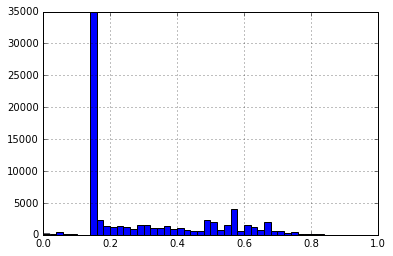

In [14]:
kofi.hist(bins=50)

In [15]:
kofiv = kofi * df.loc[:, ver]
kofiv = kofiv.loc[kofiv>0]

kofis = kofi * ~(df.loc[:, ver].replace(np.nan, True))
kofis = kofis.loc[kofis>0]

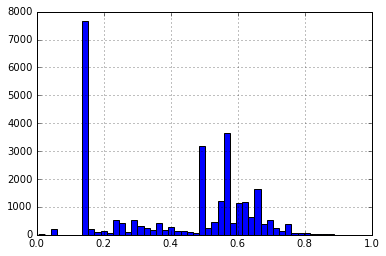

In [16]:
kofis.hist(bins=50)

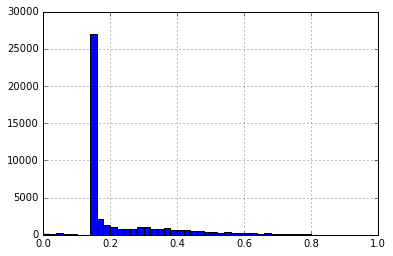

In [17]:
kofiv.hist(bins=50)

Jak velké bylo kofinancování veřejných a soukromých projektů, podle programu. Tabulka je trochu kryptická, princip je ale celkem snadný. Odpovídá na otázku *Jaká je průměrná míra kofinancování?* První řádek tak říká, že veřejné dopravní programy jsou financovány z třetiny (35.34 %) národními zadavateli, zbytek dělají finance z EU. Soukromé dopravní projekty jsou kofinancovány mnohem více, přes dvě třetiny prostředků jdou od oněch vykonavatelů, zbylých 30 % dostávají od EU.

In [18]:
kofid = df.groupby([prog, ver]).sum().loc[:, [celk, sml]]
kofid = (100*(1 - kofid.loc[:, sml] / kofid.loc[:, celk])).unstack().round(2)
kofid

Veřejná instituce,False,True
Program,,
CZ.1.01 OP Doprava,68.77,35.34
CZ.1.02 OP Životní prostředí,52.00,40.88
CZ.1.03 OP Podnikání a inovace,59.65,32.42
CZ.1.04 OP Lidské zdroje a zaměstnanost,15.12,15.01
CZ.1.05 OP Výzkum a vývoj pro inovace,30.16,31.39
CZ.1.06 Integrovaný operační program,43.14,21.18
CZ.1.07 OP Vzdělávání pro konkurenceschopnost,15.00,15.00
CZ.1.08 OP Technická pomoc,15.00,15.25
CZ.1.09 ROP NUTS II Severozápad,60.05,29.13


In [19]:
kofid.to_csv('vystupy/tabulky/kofinancovani-program.csv')
kofid.to_excel('vystupy/tabulky/kofinancovani-program.xlsx')

## Dle zaměstnanců
Podíváme se na operační programy podle počtu zaměstnanců v recipientních firmách a institucích.

In [20]:
zz = df.loc[:, zam]
zo = sorted(zz.unique(), key = lambda x: int(x.split(' ')[0]))
df.loc[:, zam] = pd.Categorical(zz, categories=zo, ordered=True)

Následujících tabulek je tolik, že jsem je rovnou dal do Excelu. Je to vesměs počet, průměrná dotace a celkový objem dotací v matici (program x velikost firmy). **Počty jsou v milionech, ne v miliardách jako normálně!**

In [21]:
xw = pd.ExcelWriter('vystupy/tabulky/operacni-programy-zamestnanci.xlsx')

In [22]:
zmag = df.groupby([prog, zam, ver]).agg([sum, len, np.mean]).loc[:, sml].unstack([ver, zam])
zmag.sortlevel(level=[0,1,2], axis=1, inplace=True)

In [23]:
cls = { 'len': 'Počet', 'sum': 'Objem', 'mean': 'Průměr' }

In [24]:
for mt, nz in cls.items():
    dv = 1 if mt == 'len' else 10**6 # if mt == 'mean' else 10**9)
    (zmag.loc[:, mt].groupby(level=1,axis=1).sum()/dv).apply(lambda x: x.round(2)).to_excel(xw, nz)
    (zmag.loc[:, mt].loc[:, True]/dv).apply(lambda x: x.round(2)).to_excel(xw, '%s (veřejné)' % nz)
    (zmag.loc[:, mt].loc[:, False]/dv).apply(lambda x: x.round(2)).to_excel(xw, '%s (soukromé)' % nz)

In [25]:
xw.save()

Další užitečný výstup je podívat na kumulativní distribuční funkce. Tabulku čtěte zleva a každé číslo znamená, kolik procent zakázek dostaly firmy s x a méně zaměstnanci. Takže v tabulce níže - soukromým firmám do 100 zaměstnanců šlo v OP Doprava 37 % zakázek. A všechny šly firmám do 2000 zaměstnanců. Zato v Životním prostředí šla půlka firmám do padesáti zaměstnanců, vše firmám pod 10000.

In [26]:
for vr in [True, False]:
    sks = zmag.loc[:, ('sum', vr)]
    cums = sks.replace(np.nan, 0).cumsum(axis=1)
    cumd = (100*cums.div(sks.sum(axis=1), axis=0))
    cumd.apply(lambda x: x.round(2)).to_csv('vystupy/tabulky/operacni-programy-kumulativne-%s.csv' % ('verejne' if vr else 'soukrome'))

In [27]:
cumd.head(2).apply(lambda x: x.round(2))

Zaměstnanců,-1,0,1 - 5,6 - 9,10 - 19,20 - 24,25 - 49,50 - 99,100 - 199,200 - 249,250 - 499,500 - 999,1000 - 1499,1500 - 1999,2000 - 2499,2500 - 2999,3000 - 3999,4000 - 4999,5000 - 9999,10000 a více
Program,,,,,,,,,,,,,,,,,,,,
CZ.1.01 OP Doprava,1.34,1.34,1.34,4.27,4.27,4.27,4.27,36.87,39.25,39.25,44.16,88.01,88.01,100.00,100.00,100.00,100.00,100.00,100.0,100.0
CZ.1.02 OP Životní prostředí,23.86,24.04,30.93,35.28,42.26,43.86,50.35,59.87,64.24,65.00,73.97,77.00,79.00,83.84,83.99,83.99,84.13,84.13,100.0,100.0
